<a href="https://colab.research.google.com/github/Tugrulyavuzates/restaurant_recommender/blob/main/CASE_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## understanding influencing factors on worker attendance
## predicting worker attendance
# got rid of one null row with 5 months of experience
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
worker_df = pd.read_excel('worker_data.xlsx', sheet_name='query_result')
worker_df.head()
worker_df_copy = worker_df.copy()
worker_df_copy.head()


,appointmentID,appointment_status,distance_to_company,application_count,seen_application_count,applicationSL_count,message_count,appointment_count,appointment_came_count,appointment_delay,education_status,experience_month,age,gender,work_time_preference,profile_fill_rate,has_used_search
0,2342511,worker_did_not_came,7.0,5,1,1,5,1,0,4,middle_school,0,18,male,full_time,83,0
1,2481390,worker_did_not_came,99.0,3,1,1,3,1,0,7,high_school,4,19,male,full_time,89,1
2,2487697,worker_did_not_came,99.0,4,1,2,3,1,0,6,high_school,0,22,male,full_time,77,0
3,2535352,worker_did_not_came,99.0,32,6,3,30,1,0,3,university,84,26,male,full_time,89,0
4,2471896,worker_did_not_came,99.0,6,4,3,6,1,0,7,university,0,24,male,full_time,77,1


In [ ]:
average_distance= worker_df['distance_to_company'].mean()
print(average_distance)

10.778614130434782


In [ ]:

print(worker_df.info())
print(worker_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   appointmentID           375 non-null    int64  
 1   appointment_status      375 non-null    object 
 2   distance_to_company     375 non-null    float64
 3   application_count       375 non-null    int64  
 4   seen_application_count  375 non-null    int64  
 5   applicationSL_count     375 non-null    int64  
 6   message_count           375 non-null    object 
 7   appointment_count       375 non-null    int64  
 8   appointment_came_count  375 non-null    int64  
 9   appointment_delay       375 non-null    int64  
 10  education_status        375 non-null    object 
 11  experience_month        375 non-null    int64  
 12  age                     375 non-null    int64  
 13  gender                  375 non-null    object 
 14  work_time_preference    368 non-null    ob

In [ ]:
#Cleaning
worker_df['experience_month'].fillna(0, inplace=True) # 0 experience is valid
worker_df.dropna(subset=['age', 'gender', 'education_status','work_time_preference'], inplace=True)

worker_df.info()
#Since this is a small dataframe i went with the choice of dropping na values(10 rows dropped)

<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, 0 to 373
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   appointmentID           368 non-null    int64  
 1   appointment_status      368 non-null    object 
 2   distance_to_company     368 non-null    float64
 3   application_count       368 non-null    int64  
 4   seen_application_count  368 non-null    int64  
 5   applicationSL_count     368 non-null    int64  
 6   message_count           368 non-null    object 
 7   appointment_count       368 non-null    int64  
 8   appointment_came_count  368 non-null    int64  
 9   appointment_delay       368 non-null    int64  
 10  education_status        368 non-null    object 
 11  experience_month        368 non-null    int64  
 12  age                     368 non-null    int64  
 13  gender                  368 non-null    object 
 14  work_time_preference    368 non-null    object 

In [ ]:
#Age groups
bins = [18, 25, 35, 45, 55, float('inf')]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']
worker_df['Age_group'] = pd.cut(worker_df['age'], bins=bins, labels=labels, right=False) # 18 yr old workers are included


In [ ]:

    # Drop rows where 'distance_to_company' is 'na' and reassign to worker_df
    worker_df = worker_df.drop(worker_df.loc[worker_df['distance_to_company'] == 'na'].index)
    worker_df = worker_df.drop(worker_df.loc[worker_df['seen_application_count'] == 'na'].index)


**The distance to company column has some unrealistic values.
Instead of replacing them with average (which is affected by unrealistic numbers, I will instead replace them with median of the column which 7 km)**


In [ ]:
# Replace unrealistic values with the median
median_distance = worker_df[(worker_df['distance_to_company'] >= 0) & (worker_df['distance_to_company'] <= 100)]['distance_to_company'].median()
worker_df.loc[(worker_df['distance_to_company'] < 0) | (worker_df['distance_to_company'] > 100), 'distance_to_company'] = median_distance
worker_df.head()

,appointmentID,appointment_status,distance_to_company,application_count,seen_application_count,applicationSL_count,message_count,appointment_count,appointment_came_count,appointment_delay,education_status,experience_month,age,gender,work_time_preference,profile_fill_rate,has_used_search,Age_group
0,2342511,worker_did_not_came,7.0,5,1,1,5,1,0,4,middle_school,0,18,male,full_time,83,0,18-25
1,2481390,worker_did_not_came,99.0,3,1,1,3,1,0,7,high_school,4,19,male,full_time,89,1,18-25
2,2487697,worker_did_not_came,99.0,4,1,2,3,1,0,6,high_school,0,22,male,full_time,77,0,18-25
3,2535352,worker_did_not_came,99.0,32,6,3,30,1,0,3,university,84,26,male,full_time,89,0,26-35
4,2471896,worker_did_not_came,99.0,6,4,3,6,1,0,7,university,0,24,male,full_time,77,1,18-25


In [ ]:
worker_df['message_count'] = worker_df['message_count'].replace('na', 0)

In [ ]:
status_mapping = {
    'worker_came': 1,
    'worker_did_not_came': 0
}

# Encode categorical variables
worker_df['education_status'] = worker_df['education_status'].astype('category').cat.codes
worker_df['gender'] = worker_df['gender'].astype('category').cat.codes
worker_df['work_time_preference'] = worker_df['work_time_preference'].astype('category').cat.codes
worker_df['appointment_status'] = worker_df['appointment_status'].map(status_mapping)
worker_df['distance_to_company'] = worker_df['distance_to_company'].astype(float)
worker_df['seen_application_count'] = worker_df['seen_application_count'].astype(float)
worker_df['message_count'] = worker_df['message_count'].astype(float)
worker_df.head()

,appointmentID,appointment_status,distance_to_company,application_count,seen_application_count,applicationSL_count,message_count,appointment_count,appointment_came_count,appointment_delay,education_status,experience_month,age,gender,work_time_preference,profile_fill_rate,has_used_search,Age_group
0,2342511,0,7.0,5,1.0,1,5.0,1,0,4,2,0,18,1,0,83,0,18-25
1,2481390,0,99.0,3,1.0,1,3.0,1,0,7,1,4,19,1,0,89,1,18-25
2,2487697,0,99.0,4,1.0,2,3.0,1,0,6,1,0,22,1,0,77,0,18-25
3,2535352,0,99.0,32,6.0,3,30.0,1,0,3,3,84,26,1,0,89,0,26-35
4,2471896,0,99.0,6,4.0,3,6.0,1,0,7,3,0,24,1,0,77,1,18-25


# Heatmap
Correlations between columns



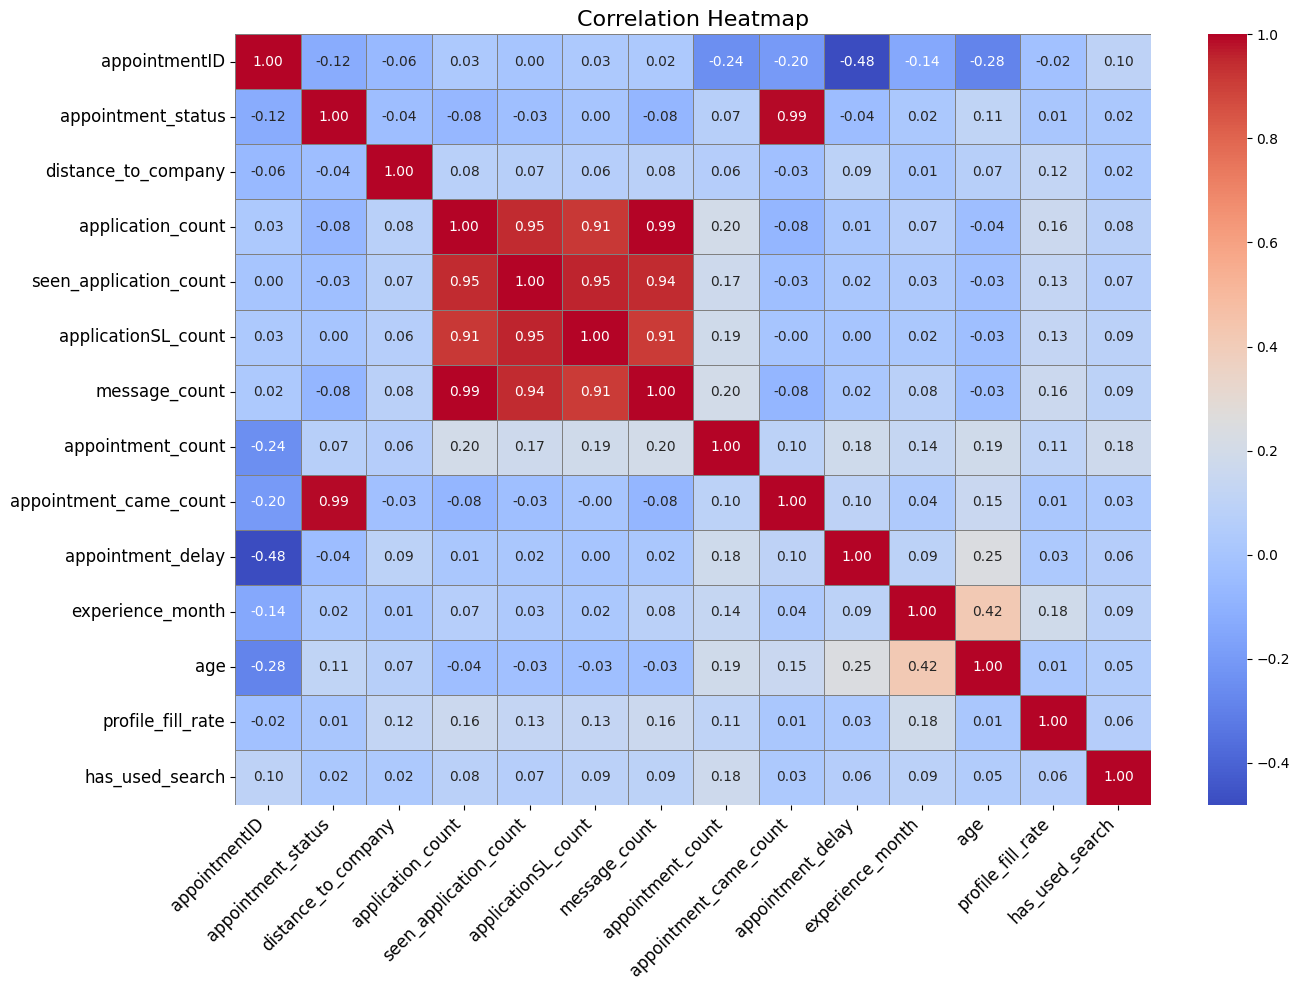

In [ ]:
numeric_df = worker_df.select_dtypes(include=[float, int])

# Step 2: Compute the correlation matrix
corr = numeric_df.corr()
plt.figure(figsize=(14, 10))  # Increase the figure size
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10},
            linewidths=0.5, linecolor='gray')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
corr_pairs = corr.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)

# Print the top 10 most positive correlations (excluding 1's)
print("Top 10 Positive Correlations:")
print(sorted_pairs[(sorted_pairs < 1) & (sorted_pairs > 0.4)].head(10))

# Print the top 10 most negative correlations
print("\nTop 10 Negative Correlations:")
print(sorted_pairs[sorted_pairs < -0.4].head(10))



Top 10 Positive Correlations:
application_count       message_count             0.994461
message_count           application_count         0.994461
appointment_status      appointment_came_count    0.988953
appointment_came_count  appointment_status        0.988953
seen_application_count  applicationSL_count       0.953742
applicationSL_count     seen_application_count    0.953742
seen_application_count  application_count         0.946388
application_count       seen_application_count    0.946388
seen_application_count  message_count             0.942237
message_count           seen_application_count    0.942237
dtype: float64

Top 10 Negative Correlations:
appointment_delay  appointmentID       -0.480876
appointmentID      appointment_delay   -0.480876
dtype: float64


In [ ]:
print(worker_df.dtypes) ##Inserted necessary conversions above


appointmentID                int64
appointment_status           int64
distance_to_company        float64
application_count            int64
seen_application_count     float64
applicationSL_count          int64
message_count              float64
appointment_count            int64
appointment_came_count       int64
appointment_delay            int64
education_status              int8
experience_month             int64
age                          int64
gender                        int8
work_time_preference          int8
profile_fill_rate            int64
has_used_search              int64
Age_group                 category
dtype: object


In [ ]:
worker_df.head() #To ensure our data is accurately changed

,appointmentID,appointment_status,distance_to_company,application_count,seen_application_count,applicationSL_count,message_count,appointment_count,appointment_came_count,appointment_delay,education_status,experience_month,age,gender,work_time_preference,profile_fill_rate,has_used_search,Age_group
0,2342511,0,7.0,5,1.0,1,5.0,1,0,4,2,0,18,1,0,83,0,18-25
1,2481390,0,99.0,3,1.0,1,3.0,1,0,7,1,4,19,1,0,89,1,18-25
2,2487697,0,99.0,4,1.0,2,3.0,1,0,6,1,0,22,1,0,77,0,18-25
3,2535352,0,99.0,32,6.0,3,30.0,1,0,3,3,84,26,1,0,89,0,26-35
4,2471896,0,99.0,6,4.0,3,6.0,1,0,7,3,0,24,1,0,77,1,18-25


# Further KPI Analysis

The structure of the code is a bit messy and perhaps could be done more smoothly on powerbi or another BI tool.
This is merely a personal preference as it allows broader options for the future

**The Analysis starts from this line below**



---



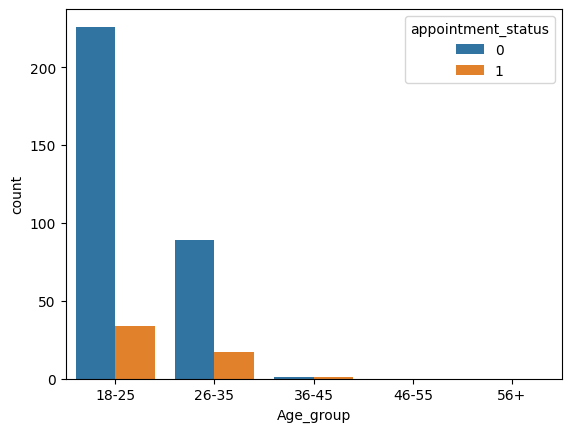

In [ ]:
sns.countplot(x='Age_group', hue='appointment_status', data=worker_df)
plt.show()

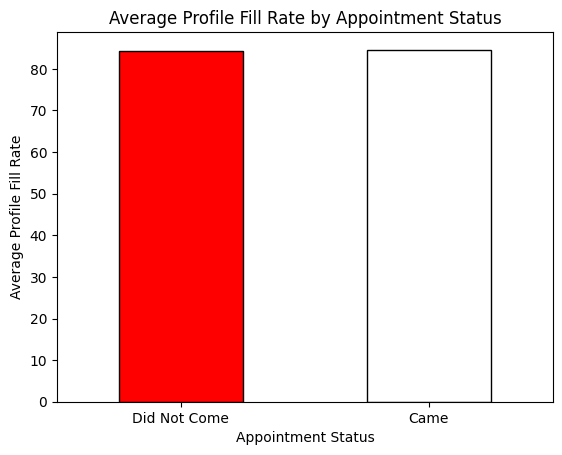

In [ ]:
colors = ['#FF0000', '#FFFFFF']  # Bright red and white
profile_fill_rate_to_appointment_status = worker_df.groupby('appointment_status')['profile_fill_rate'].mean()
fig, ax = plt.subplots()
profile_fill_rate_to_appointment_status.plot(kind='bar', color=colors, edgecolor='black', ax=ax)

# Set the labels and title
ax.set_xlabel('Appointment Status')
ax.set_ylabel('Average Profile Fill Rate')
ax.set_title('Average Profile Fill Rate by Appointment Status')

# Customize the ticks
ax.set_xticklabels(['Did Not Come', 'Came'], rotation=0)

# Display the plot
plt.show()

No significant difference!!

Although the heatmap does not show a direct relation between distance and appointment status, I believe it is worth to look at the relationship once again

# Boxplot
The plot below shows that the farther away a candidate is from a company, the less likely they are to show up to the interview
--> It may be useful to recommend the candidates, jobs that are up to 20 km away from their location
--> It may also be useful to let the users know how important it is to accurately put in their location information.

<ipython-input-19-0a68990f2c06>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='appointment_status', y='distance_to_company', data=worker_df, palette=['#FF0000', '#FFFFFF'])


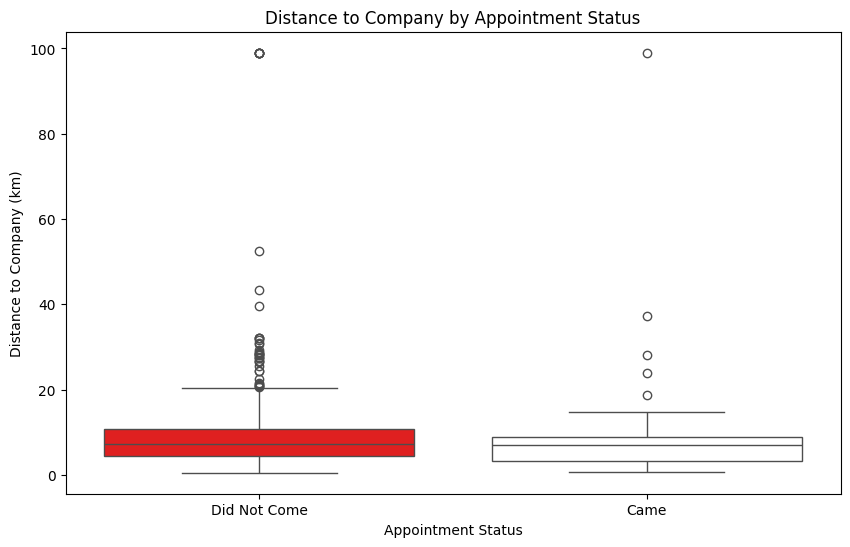

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='appointment_status', y='distance_to_company', data=worker_df, palette=['#FF0000', '#FFFFFF'])

# Set labels and title
plt.xlabel('Appointment Status')
plt.ylabel('Distance to Company (km)')
plt.title('Distance to Company by Appointment Status')

# Customize the x-tick labels
plt.xticks([0, 1], ['Did Not Come', 'Came'])

# Show the plot
plt.show()

# Attendance Rate
**appointment_came_count / appointment_count**

In [ ]:
# Replace appointment_count greater than 1000 with 1
worker_df.loc[worker_df['appointment_count'] > 1000, 'appointment_count'] = 1

# Verify the replacement
print(worker_df[worker_df['appointment_count'] > 1000])
attendance_rate = worker_df.groupby('Age_group')[['appointment_came_count', 'appointment_count']].sum()
attendance_rate['attendance_rate'] = (attendance_rate['appointment_came_count'] / attendance_rate['appointment_count']) * 100
attendance_rate.head()

Empty DataFrame
Columns: [appointmentID, appointment_status, distance_to_company, application_count, seen_application_count, applicationSL_count, message_count, appointment_count, appointment_came_count, appointment_delay, education_status, experience_month, age, gender, work_time_preference, profile_fill_rate, has_used_search, Age_group]
Index: []


,appointment_came_count,appointment_count,attendance_rate
Age_group,,,
18-25,34,275,12.363636
26-35,17,119,14.285714
36-45,2,4,50.000000
46-55,0,0,NaN
56+,0,0,NaN


# Average Application Rate

In [ ]:
# Calculate average application count
average_application_count = worker_df['application_count'].mean()
print(f"Average Application Count: {average_application_count:.2f}")


Average Application Count: 38.27


In [ ]:
# Calculate the ratio of application count to appointment came count
application_to_came_ratio = worker_df['appointment_came_count'].sum() / worker_df['application_count'].sum()
print(f"Application to Appointment Came Ratio: {application_to_came_ratio:.2f}")

# Calculate the ratio of application count to application shortlist (SL) count
application_to_shortlist_ratio = worker_df['applicationSL_count'].sum() / worker_df['application_count'].sum()
print(f"Application to Application Shortlist (SL) Ratio: {application_to_shortlist_ratio:.2f}")


Application to Appointment Came Ratio: 0.00
Application to Application Shortlist (SL) Ratio: 0.22


In [ ]:
worker_df['shortlisted'] = worker_df['applicationSL_count'] > 0

# Calculate the percentage of attended and not attended appointments for shortlisted and not shortlisted workers
shortlisted_appointment_status = worker_df.groupby(['shortlisted', 'appointment_status']).size().unstack().fillna(0)
shortlisted_appointment_status = shortlisted_appointment_status.div(shortlisted_appointment_status.sum(axis=1), axis=0)
print(shortlisted_appointment_status)

appointment_status         0         1
shortlisted                           
True                0.858696  0.141304


No meaningful differences!!

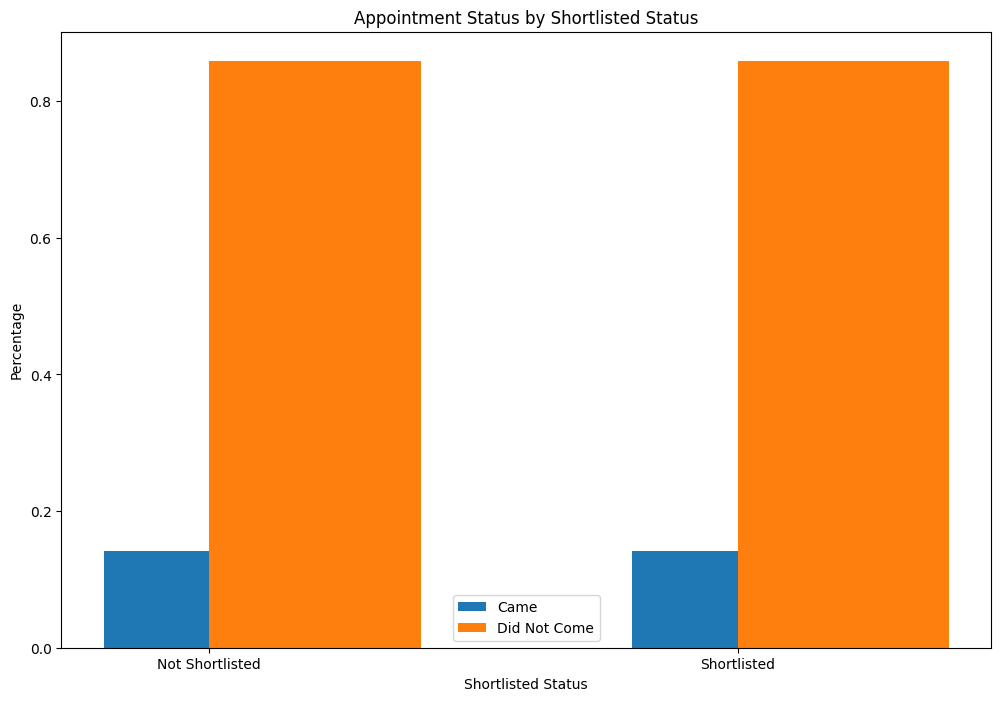

In [ ]:
# Prepare data for visualization
labels = ['Not Shortlisted', 'Shortlisted']
came_ratios = shortlisted_appointment_status[1]
not_came_ratios = shortlisted_appointment_status[0]
x = range(len(labels))

fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data
ax.bar(x, came_ratios, width=0.4, label='Came', color='#1f77b4', align='center')
ax.bar(x, not_came_ratios, width=0.4, label='Did Not Come', color='#ff7f0e', align='edge')

# Set the labels and title
ax.set_xlabel('Shortlisted Status')
ax.set_ylabel('Percentage')
ax.set_title('Appointment Status by Shortlisted Status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()

In [ ]:
experience_app_status = worker_df.groupby('appointment_status')[['experience_month']].mean()
print(experience_app_status)

                    experience_month
appointment_status                  
0                          28.069620
1                          29.711538


                    appointment_delay
appointment_status                   
0                            5.518987
1                            3.807692


<ipython-input-26-3b22f2063866>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='appointment_status', y='appointment_delay', data=app_delay_to_app_status, palette=colors)


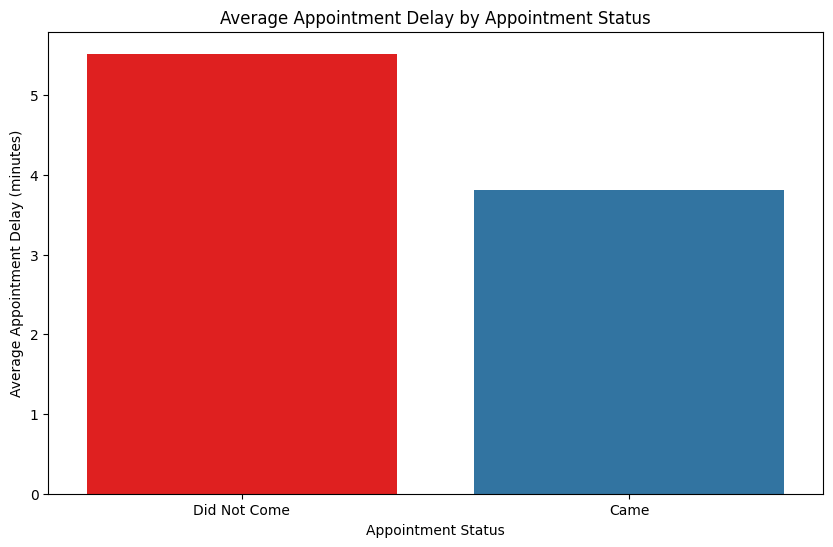

In [ ]:


# Calculate the average appointment delay grouped by appointment status
app_delay_to_app_status = worker_df.groupby('appointment_status')[['appointment_delay']].mean()
print(app_delay_to_app_status)

# Define labels and colors for the plot
labels = ['Did Not Come', 'Came']
colors = ['#FF0000', '#1f77b4']  # Red for 'Did Not Come', Blue for 'Came'

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='appointment_status', y='appointment_delay', data=app_delay_to_app_status, palette=colors)

# Set the labels and title
plt.xlabel('Appointment Status')
plt.ylabel('Average Appointment Delay (minutes)')
plt.title('Average Appointment Delay by Appointment Status')

# Customize the x-tick labels
plt.xticks([0, 1], labels)

# Show the plot
plt.show()

# Delay's affect on Status
It shows that people who did not show up to the interview waited on average two more days

# Conclusion
In this analysis, we examined several factors that could potentially influence the appointment attendance of workers. After careful consideration and visualization of the data, we have identified two key insights:

Distance to the Company:

Insight: There is a significant relationship between the distance a candidate has to travel and their likelihood of attending the appointment. Workers who live further away from the company are less likely to show up for their scheduled appointments.
Visualization: This was demonstrated using a box plot that showed higher median distances for candidates who did not attend their appointments compared to those who did.
Appointment Delay:

**Insight: Appointment delays also impact whether a candidate attends the appointment. Longer delays are associated with a higher likelihood of the candidate not attending the appointment.
Visualization: A bar chart illustrated that the average appointment delay was notably different between candidates who showed up and those who did not.
These insights highlight two critical areas that can be addressed to improve attendance rates. By focusing on reducing the travel distance for candidates, perhaps through remote interviewing options or local recruitment drives, and minimizing appointment delays through better scheduling and communication, companies can potentially enhance their appointment attendance rates.**

Past Appointments: Although not conclusive but there seems to be a slight correlation on past appointment status determining whether the candidate will show up to the interview or not, more tests required.

Overall, this analysis underscores the importance of considering logistical and procedural factors in recruitment processes, as they significantly impact candidate behavior and appointment outcomes. Future efforts should continue to explore and address these and other related factors to further optimize recruitment strategies.






